In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/approxCollection.csv")

In [34]:
df

,Reward,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,5.031298,1.5,1.5,1.95,1.5,1.85,1.95,1.5
1,5.539822,1.5,1.4,1.95,1.5,1.85,1.95,1.5
2,5.539822,1.5,1.4,1.85,1.5,1.85,1.95,1.5
3,6.181434,1.5,1.3,1.85,1.5,1.85,1.95,1.5
4,6.181434,1.6,1.3,1.85,1.5,1.85,1.95,1.5
...,...,...,...,...,...,...,...,...
37478,2.495335,3.3,3.8,2.20,3.8,2.20,2.10,1.3
37479,2.700886,3.3,3.8,2.20,3.8,2.20,2.10,1.2
37480,2.700886,3.3,3.8,2.20,3.8,2.20,2.10,1.1
37481,2.883722,3.3,3.8,2.20,3.8,2.20,2.10,1.0


In [7]:
df0 = pd.read_csv("../data/approxLarge.csv")
df1 = pd.read_csv("../data/approxWobly.csv")
df2 = pd.read_csv("../data/approx1000.csv")
df3 = pd.read_csv("../data/approxXd.csv")
df4 = pd.read_csv("../data/approx200.csv")
df2 = df2.drop(columns=["Step"])
df4 = df4.drop(columns=["Step"])
dfs = [df0, df1, df2, df3, df4]

In [35]:
# df.Reward = df.Reward.round(3)
df = df.drop_duplicates()

In [3]:
df.sort_values(by=['Reward'], ascending=False).head(10).to_csv("../data/top10.csv", index=False)

In [1]:
from gymnasium.envs.registration import register
import gymnasium as gym
register(
    # unique identifier for the env `name-version`
    id="PharmacophoreEnv-v0",
    # path to the class for creating the env
    entry_point="customenv:PharmacophoreEnv",
    max_episode_steps=200,
    # Max number of steps per episode, using a `TimeLimitWrapper`
    kwargs={
        "output": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\hitlists\\hitlist', 
        "querys": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\querys\\sEH-1ZD5_mod5_LS_3.02.pml', 
        "actives_db": r'C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\actives_mini.ldb2',
        "inactives_db": r"C:\\Users\\kilia\\MASTER\\rlpharm\\data\\ldb2s\\inactives_mini.ldb2",
        "approximator": r"C:\Users\kilia\MASTER\rlpharm\data\models\approximator\best.pt",
        "ldba": 36,
        "ldbi": 112,
        "features": "H,HBA,HBD",
        "enable_approximator": False,
        "hybrid_reward": True,
        "inf_mode": False
        },
)
env = gym.make("PharmacophoreEnv-v0")

In [40]:
df[df["Reward"] == df["Reward"].max()]

,Reward,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
3320,16.927083,1.53,2.88,3.05,1.48,1.95,1.92,2.33


In [45]:
def scoring(actives, inactives):
    """
    Calculate score
    :return: score query pharmacophores against actives and inactives database        
    """       
    if actives == 0:
        return 0
    EF = (actives/(actives+inactives))/(58/(58+177))
    print(EF)
    if inactives == 0:
        inactives = 1
    score = (EF + actives) / (inactives)
    return score


In [46]:
scoring(14,4)

3.1513409961685825


4.287835249042145

In [11]:
bdf = pd.concat(dfs)
bdf = bdf.drop_duplicates()

In [13]:
bdf = bdf[(bdf.Feature0 > 1) & (bdf.Feature1 > 1) & (bdf.Feature2 > 1) & (bdf.Feature3 > 1) & (bdf.Feature4 > 1) & (bdf.Feature5 > 1) & (bdf.Feature6 > 1)]
bdf = bdf[(bdf.Feature0 < 6) & (bdf.Feature1 < 6) & (bdf.Feature2 < 6) & (bdf.Feature3 < 6) & (bdf.Feature4 < 6) & (bdf.Feature5 < 6) & (bdf.Feature6 < 6)]

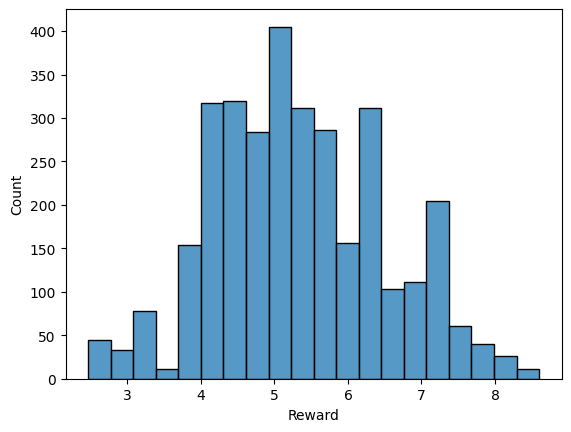

In [28]:
#sns.pairplot(data=bdf)
# histogram of rewards
sns.histplot(data=df, x="Reward", bins=20)
plt.show()

In [20]:
bdf = bdf.sample(frac=1).reset_index(drop=True)
bdf.to_csv("../data/approxCollection.csv", index=False)

In [29]:
df.to_csv("../data/approxCollection.csv", index=False)